# Исследование продажи видео-игр 

Интернет-магазине «Стримчик» продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

==Описание данных: 
- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

## Изучение данных 

In [1]:
# Первычное изучение данных 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
from scipy import stats as st
data = pd.read_csv('/datasets/games.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


- Много пропущенных значений в переменных (Critic_Score, User_Score, Rating). 
- В переменной User_Score многие значения 'tbd', что означает отсутствие достаточного числа оценок пользователей для вывода суммарной оценки. 
- Стоит написать названия всех столбцов строчными буквами. 
- Необходимо превратить тип переменной User_Score в float. 
- В данных отсутствуют дубликаты.

## Подготовка данных 

In [2]:
#Изменение названий столбцов 
data.columns = data.columns.str.lower()

#Изменение типов переменных 
data.loc[data['year_of_release'].isna() ,'year_of_release'] = 0
data['year_of_release'].astype('int')

data.loc[data['user_score'] == 'tbd','user_score'] = 11
data['user_score'] = pd.to_numeric(data['user_score'])

#расчет суммарных продаж во всех регионах 
data['all_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Верно, по своей сути tbd и является пропуском. Отлично, что определяешь неявные пропущенные значения. Только можно осуществить замену на nan. 

</div>

- Чтобы смог превратить тип переменной year_of_release в int необходимо было заполнить пропущенные значения нулями. 
- Чтобы смог превратить тип переменной user_score в float необходимо было поменять значение 'tbd' на число, которое не входит в шкалу оценок. 

## Исследовательский анализ данных

In [3]:
#Число выпсукаемых игр по годам 
print(data.groupby('year_of_release').agg({'name':['count']}))
data = data.query('year_of_release > 1993')

                 name
                count
year_of_release      
0.0               269
1980.0              9
1981.0             46
1982.0             36
1983.0             17
1984.0             14
1985.0             14
1986.0             21
1987.0             16
1988.0             15
1989.0             17
1990.0             16
1991.0             41
1992.0             43
1993.0             60
1994.0            121
1995.0            219
1996.0            263
1997.0            289
1998.0            379
1999.0            338
2000.0            350
2001.0            482
2002.0            829
2003.0            775
2004.0            762
2005.0            939
2006.0           1006
2007.0           1197
2008.0           1427
2009.0           1426
2010.0           1255
2011.0           1136
2012.0            653
2013.0            544
2014.0            581
2015.0            606
2016.0            502


- До 1993 года меньше 100 игр выпускались каждый год. Пока что стоит анализировать данные начиная с 1994 года. 

In [4]:
# Определение самых популярных платформ 
platforms = data.groupby(['platform']).agg({'all_sales':['sum']}).reset_index()
platforms.columns = ['platform','all_sales']
print(platforms.sort_values(by='all_sales', ascending= False))

   platform  all_sales
14      PS2    1233.56
26     X360     961.24
15      PS3     931.34
24      Wii     891.18
3        DS     802.76
13       PS     727.58
16      PS4     314.14
5       GBA     312.88
17      PSP     289.53
1       3DS     257.81
11       PC     252.66
27       XB     251.57
8       N64     218.01
6        GC     196.73
28     XOne     159.32
4        GB     152.08
21     SNES      84.67
25     WiiU      82.19
18      PSV      53.81
19      SAT      33.59
2        DC      15.95
7       GEN       8.13
23       WS       1.42
10       NG       1.23
20      SCD       0.36
22     TG16       0.16
9       NES       0.11
0       3DO       0.10
12     PCFX       0.03


platform
DS      AxesSubplot(0.125,0.125;0.775x0.755)
PS      AxesSubplot(0.125,0.125;0.775x0.755)
PS2     AxesSubplot(0.125,0.125;0.775x0.755)
PS3     AxesSubplot(0.125,0.125;0.775x0.755)
Wii     AxesSubplot(0.125,0.125;0.775x0.755)
X360    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

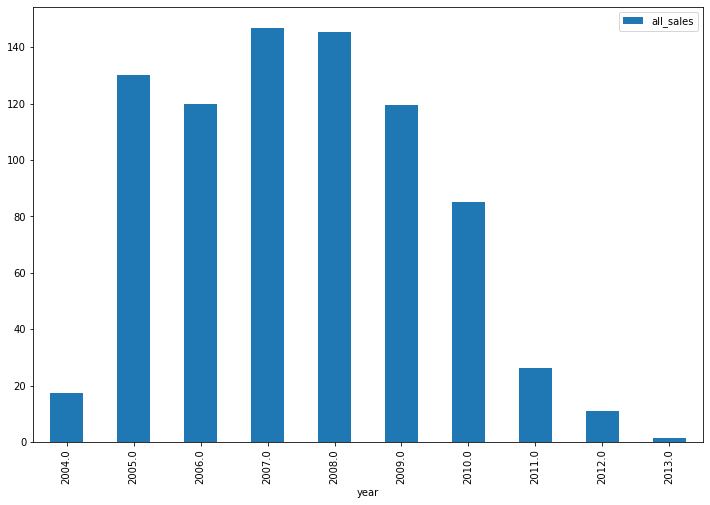

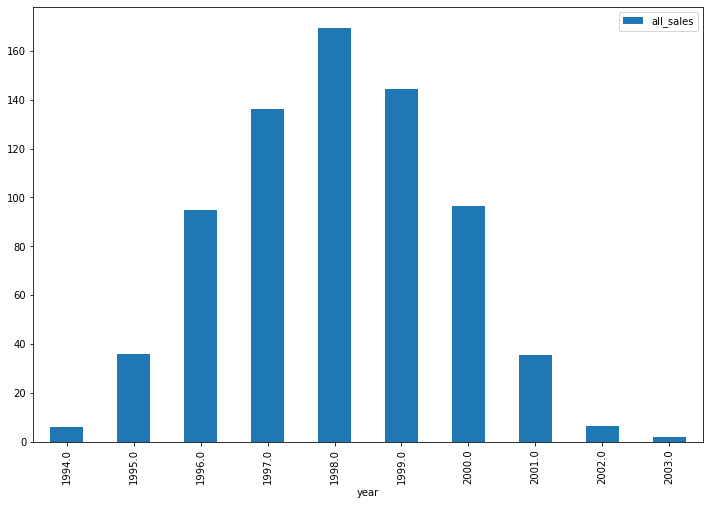

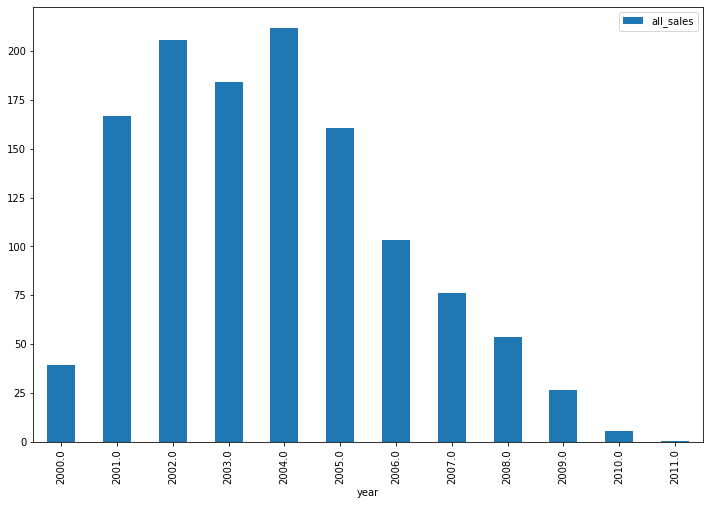

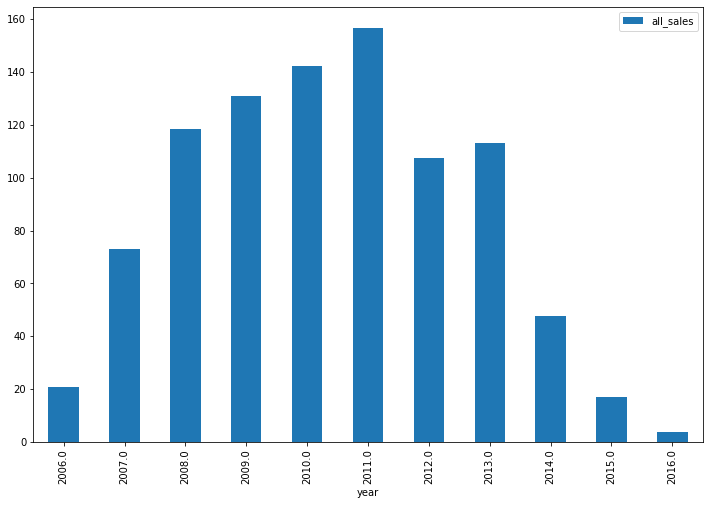

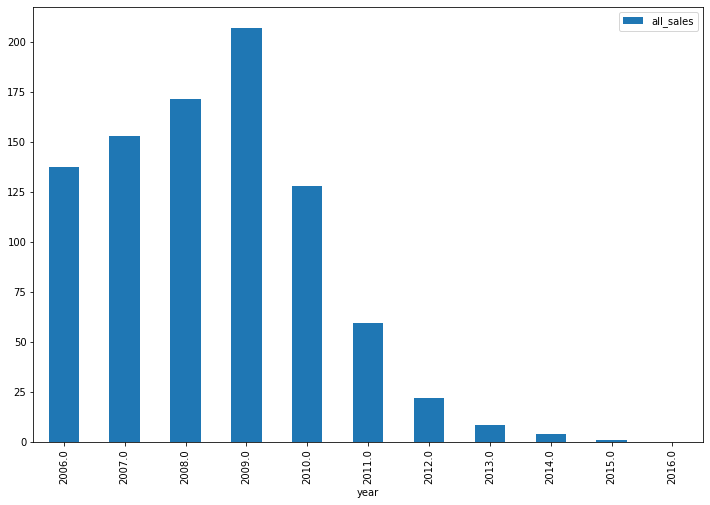

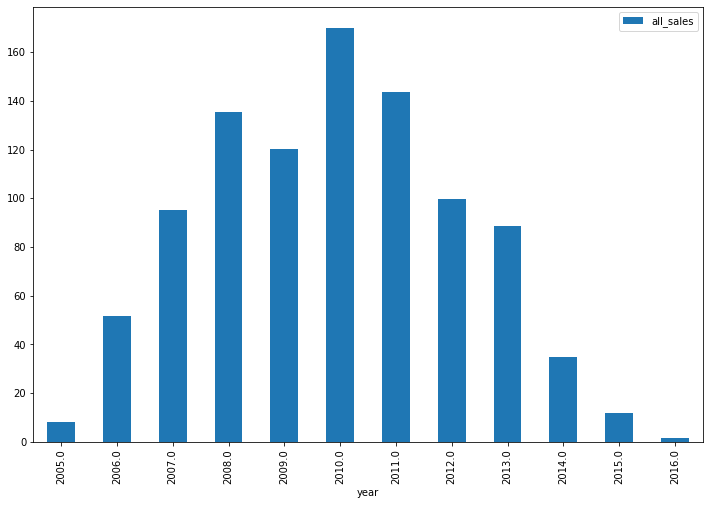

In [5]:
#Изучение жизненного цикла платформы  
platforms_by_year = data[data['platform'].isin(["PS2", "X360", "PS3", "Wii", "DS", "PS"])]
platforms_by_year = platforms_by_year.groupby(['platform','year_of_release']).agg({'all_sales':['sum']}).reset_index()
platforms_by_year.columns = ['platform','year','all_sales']
platforms_by_year.groupby(['platform']).plot(x='year', y='all_sales', kind= 'bar', figsize=(12,8))

In [6]:
platforms_by_year2 = data.groupby(['platform']).agg({'year_of_release':['min','max']}).reset_index()
platforms_by_year2.columns = ['platform','year_min','year_max']
platforms_by_year2['life_cycle'] = platforms_by_year2['year_max'] - platforms_by_year2['year_min']
print(platforms_by_year2['life_cycle'].median())
platforms_by_year2

5.0


,platform,year_min,year_max,life_cycle
0,3DO,1994.0,1995.0,1.0
1,3DS,2011.0,2016.0,5.0
2,DC,1998.0,2008.0,10.0
3,DS,2004.0,2013.0,9.0
4,GB,1994.0,2001.0,7.0
5,GBA,2000.0,2007.0,7.0
6,GC,2001.0,2007.0,6.0
7,GEN,1994.0,1994.0,0.0
8,N64,1996.0,2002.0,6.0
9,NES,1994.0,1994.0,0.0


- Жизненный цикл игровых платформ длится от 5 до 8 лет. Соответственно актуальный период для изучения нынешнего состояния рынка и предоставления прогнозов начинается  с 2010 года. 

In [7]:
# Определение платформ-лидеров продажи 
data_new = data.query('year_of_release > 2010')

platfroms_leaders = data_new.groupby('platform').agg({'all_sales':['sum']})
platfroms_leaders.columns = ['sales']

print(platfroms_leaders.sort_values(by='sales', ascending = False))

           sales
platform        
PS3       445.57
X360      380.38
PS4       314.14
3DS       257.81
XOne      159.32
PC         97.68
Wii        95.02
WiiU       82.19
PSV        53.81
DS         38.73
PSP        29.01
PS2         0.45


- За период с 2010 года по 2016 год 5 платформ лидируют продажи с большим отрывом от остальных платформ. 

platform
3DS     AxesSubplot(0.125,0.125;0.775x0.755)
PS3     AxesSubplot(0.125,0.125;0.775x0.755)
PS4     AxesSubplot(0.125,0.125;0.775x0.755)
X360    AxesSubplot(0.125,0.125;0.775x0.755)
XOne    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

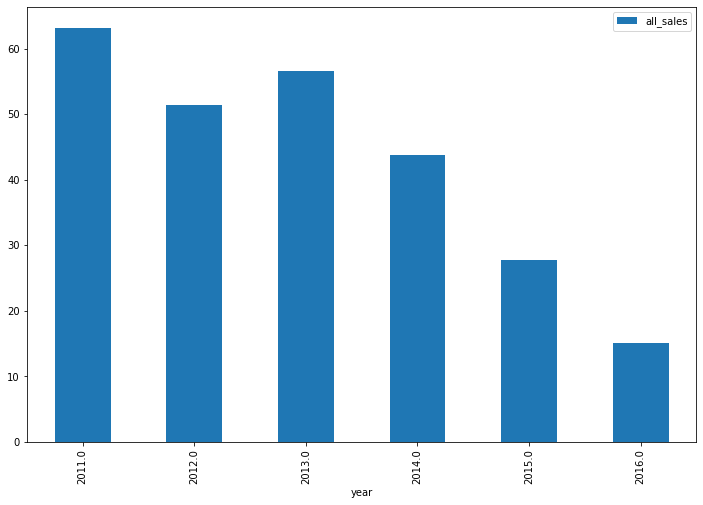

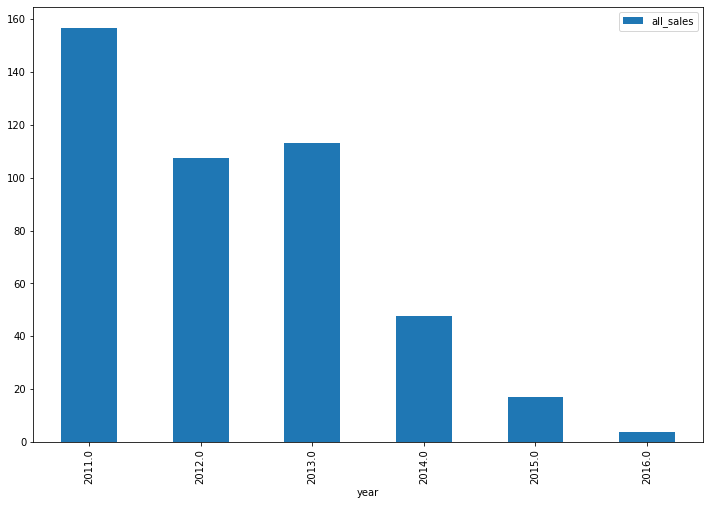

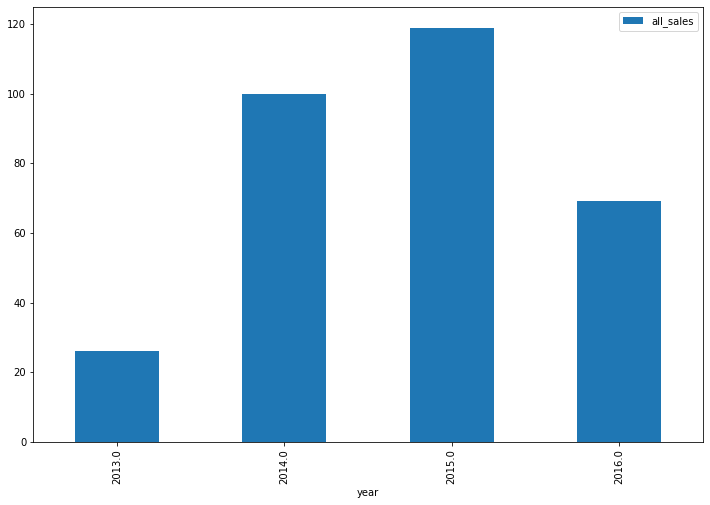

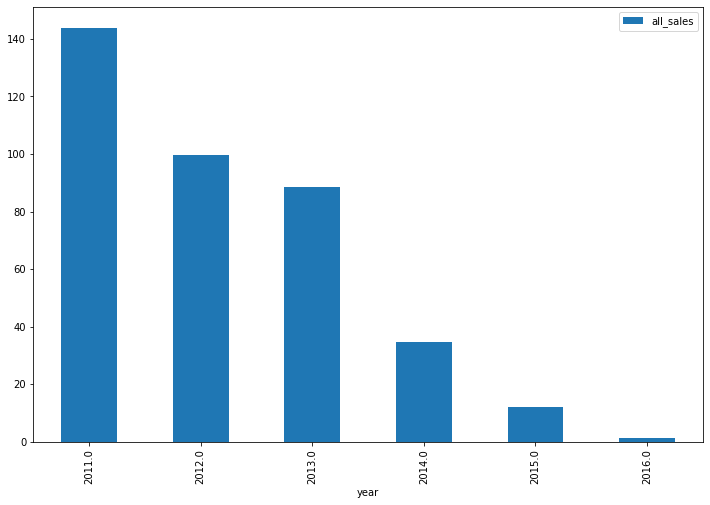

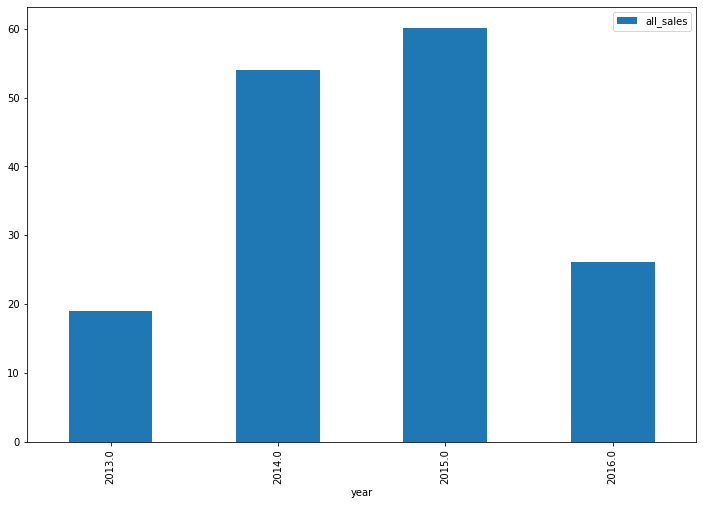

In [8]:
# Определение тенденции продажи у платформ-лидеров 
platforms_leaders_year = data_new[data_new['platform'].isin(["PS4", "X360", "PS3", "XOne", "3DS"])]
platforms_leaders_year2 = platforms_leaders_year.groupby(['platform','year_of_release']).agg({'all_sales':['sum']}).reset_index()
platforms_leaders_year2.columns = ['platform','year','all_sales']

platforms_leaders_year2.groupby(['platform']).plot(x='year', y='all_sales', kind= 'bar', figsize=(12,8))

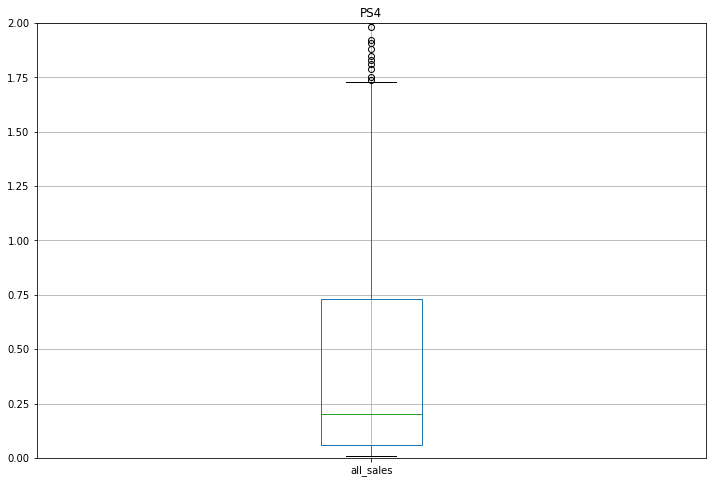

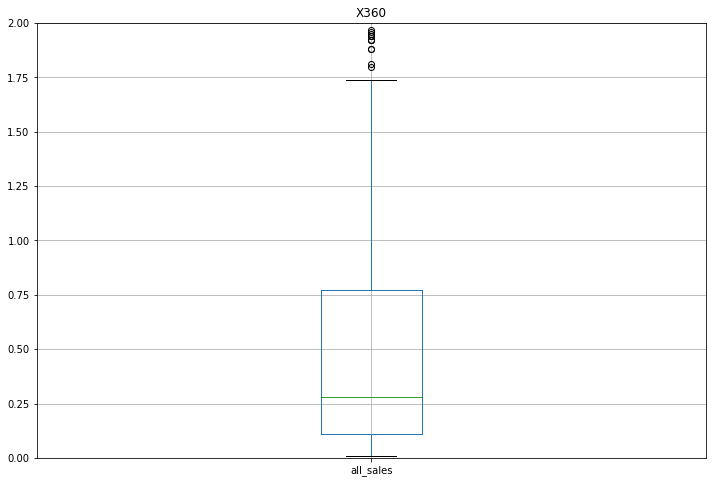

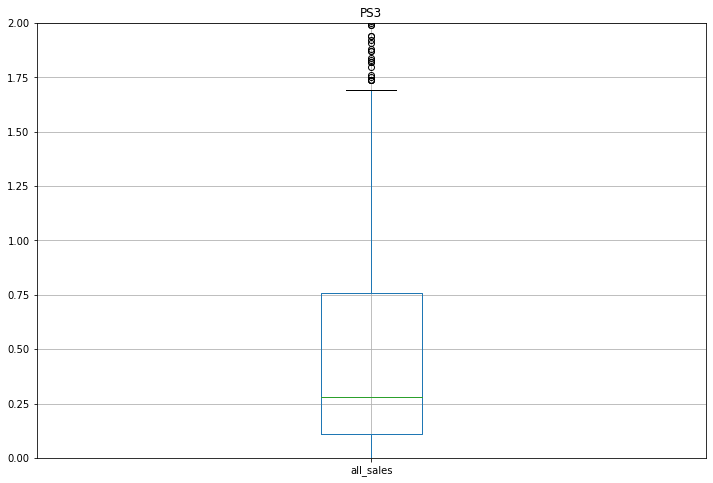

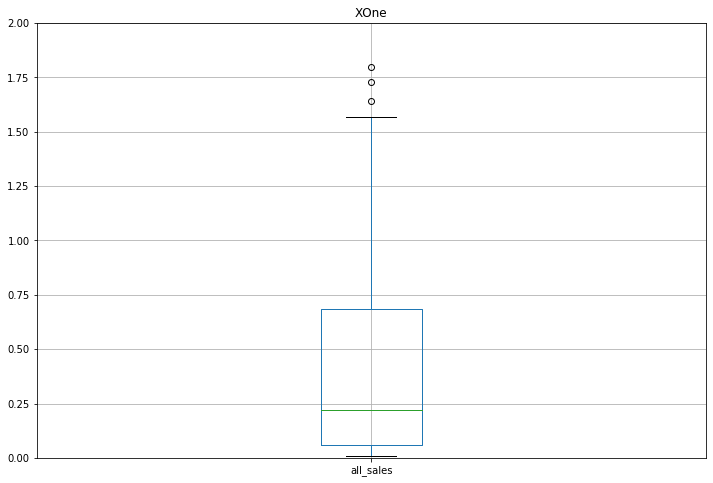

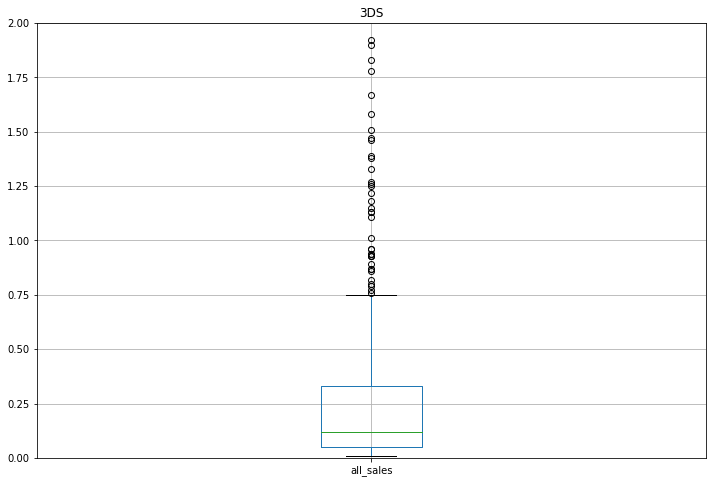

In [9]:
data_new_final = data_new[data_new['platform'].isin(["PS4", "X360", "PS3", "XOne", "3DS"])]

def boxp(plat):
    databox = data.query('platform == @plat')
    g = databox.boxplot(column= 'all_sales', figsize=(12,8))
    g.set_title(plat)
    g.set_ylim(0,2)
    plt.show()

boxp("PS4")
boxp("X360")
boxp("PS3")
boxp("XOne")
boxp("3DS")

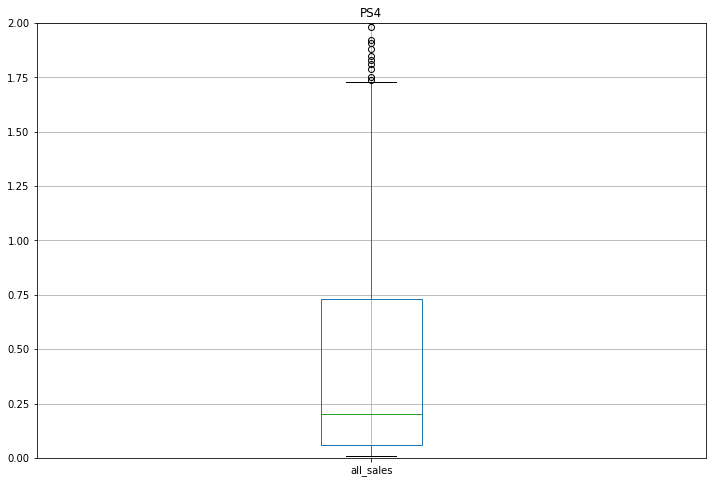

In [10]:
# Код ревьюера
databox = data.query('platform == "PS4"')
g = databox.boxplot(column= 'all_sales', figsize=(12,8))
g.set_title('PS4')
g.set_ylim(0,2)
plt.show()

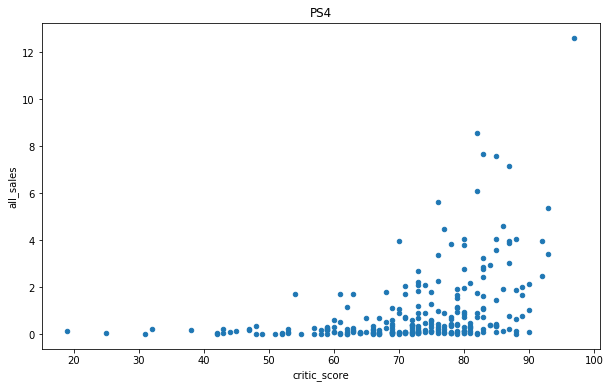

0.406567902061781


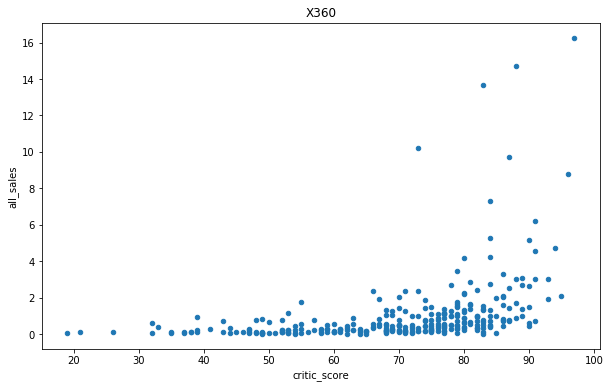

0.3912533245484554


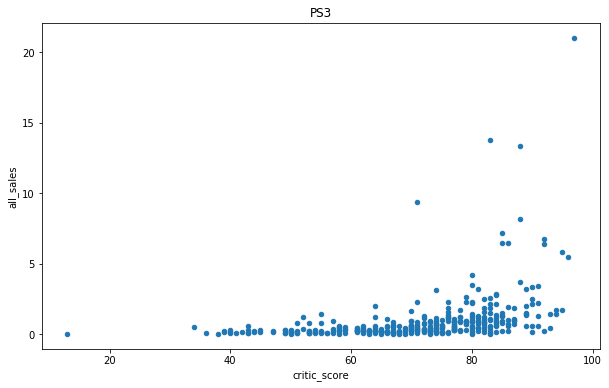

0.38011114718290767


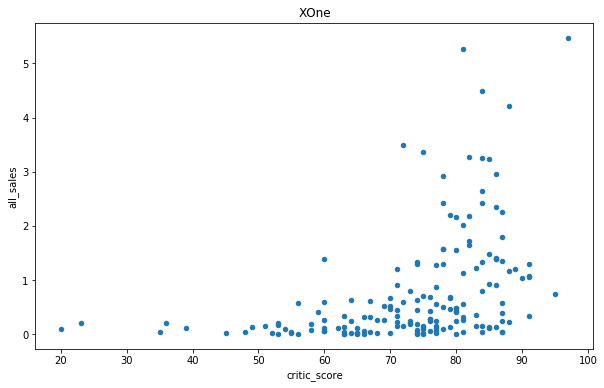

0.41699832800840175


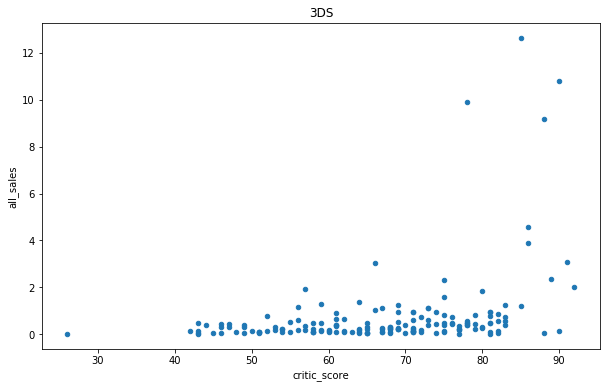

0.34873973059848346


In [11]:
def critics_inf(plat):
    df = data_new_final.query('platform == @plat')
    g = df.plot(y= 'all_sales', x= 'critic_score', kind= 'scatter',figsize=(10,6))
    g.set_title(plat)
    plt.show()
    print(df['all_sales'].corr(df['critic_score']))

critics_inf("PS4")
critics_inf("X360")
critics_inf("PS3")
critics_inf("XOne")
critics_inf("3DS")

Между продажей игр и мнениями критков наблюдается средняя положительная корреляция. Коэффициент корреляции составляет составляет около (0.4) для всех платформ кроме 3DS где он составляет (0.34) 

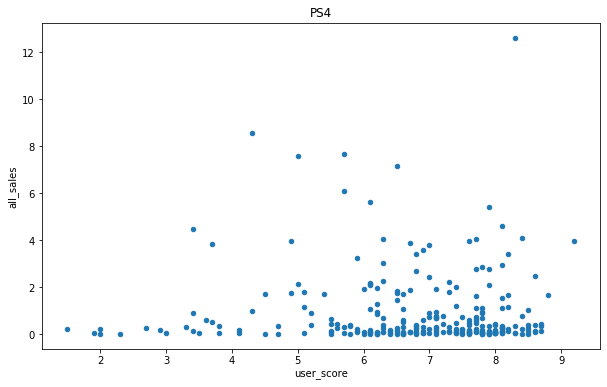

-0.031957110204556424


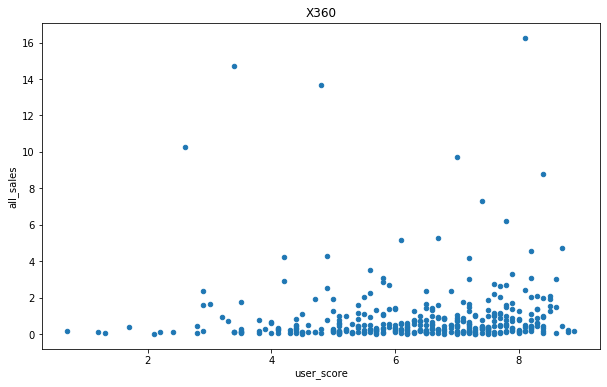

0.0389181707291026


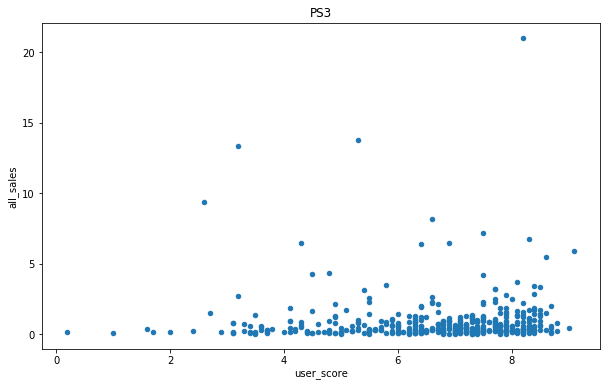

0.014089348308019395


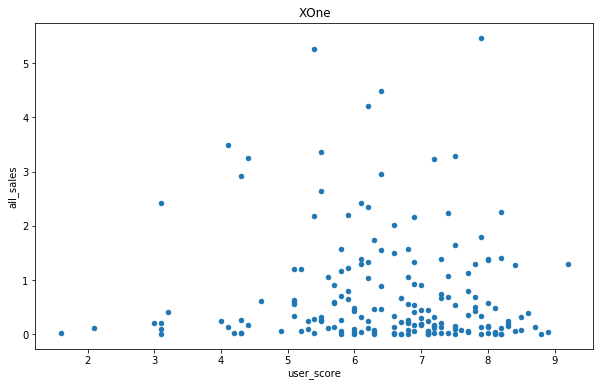

-0.06892505328279412


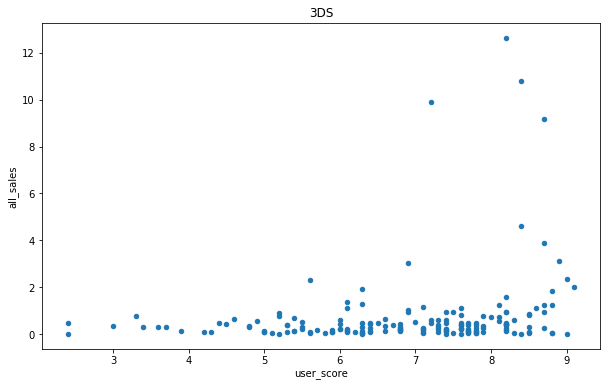

0.22207843643390884


In [12]:
def user_inf(plat):
    df = data_new_final.query('platform == @plat and user_score != 11')
    g = df.plot(y= 'all_sales', x= 'user_score', kind= 'scatter',figsize=(10,6))
    g.set_title(plat)
    plt.show()
    print(df['all_sales'].corr(df['user_score']))

user_inf("PS4")
user_inf("X360")
user_inf("PS3")
user_inf("XOne")
user_inf("3DS")

In [13]:
genres_data = data_new.groupby('genre').agg({'name':['count']})
genres_data.columns = ['games_by_genre']

print(genres_data.sort_values(by='games_by_genre', ascending = False))

              games_by_genre
genre                       
Action                  1269
Role-Playing             465
Adventure                410
Sports                   389
Misc                     375
Shooter                  329
Racing                   180
Fighting                 159
Simulation               136
Platform                 122
Strategy                 117
Puzzle                    71


In [14]:
genres_data2 = data_new.groupby('genre').agg({'all_sales':['sum']})
genres_data2.columns = ['sales_by_genre']

print(genres_data2.sort_values(by='sales_by_genre', ascending = False))

              sales_by_genre
genre                       
Action                557.80
Shooter               402.91
Role-Playing          245.63
Sports                237.15
Misc                  139.42
Platform               88.68
Racing                 88.31
Fighting               66.90
Simulation             50.26
Adventure              45.04
Strategy               22.16
Puzzle                  9.85


- Самые выпускаемые жанры - (Action, Role-Playing, Adventure, Sports, Misc, Shooter).
- Самые продавемые жанры - (Action, Shooter, Role-Playing, Sports, Misc).
- Можно сделать вывод о том, что самые продаваемые жанры это и самые выпскаемые кроме жанр Adventure. Многие игры жанра Adventure выпускаются, однако мало продаются.  

## портрет пользователя каждого региона

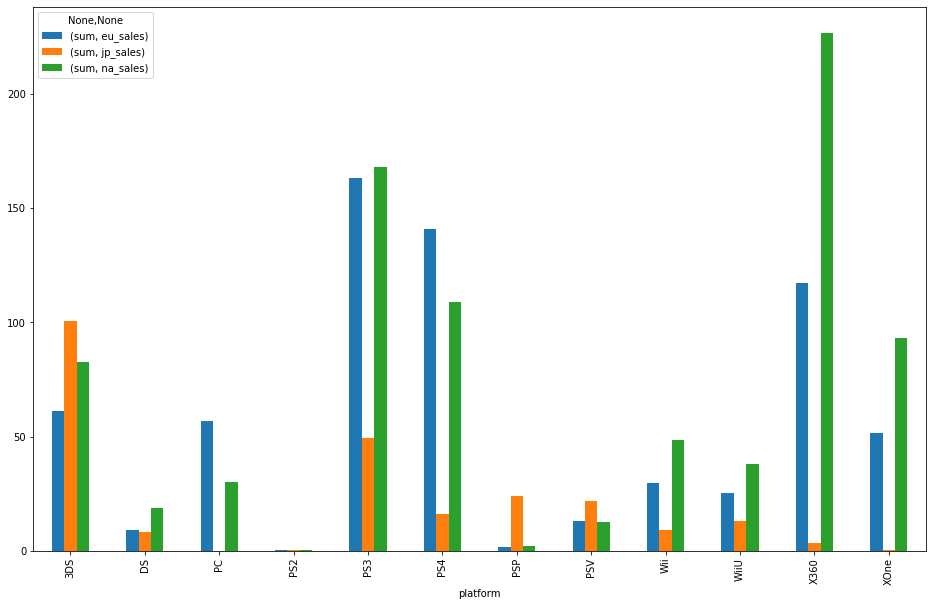

sum                  
         eu_sales jp_sales na_sales
platform                           
3DS         61.27   100.62    82.65
DS           9.24     8.04    18.86
PC          56.70     0.00    29.88
PS2          0.13     0.09     0.13
PS3        163.10    49.39   168.26
PS4        141.09    15.96   108.74
PSP          1.77    24.04     2.19
PSV         13.07    21.84    12.47
Wii         29.60     8.97    48.56
WiiU        25.13    13.01    38.10
X360       117.10     3.35   226.80
XOne        51.59     0.34    93.12

In [15]:
#Определение самых популярных платформ 
clients_platforms = data_new.pivot_table(index='platform', values=['na_sales','eu_sales','jp_sales'], aggfunc=['sum'])
clients_platforms.plot(kind='bar', figsize=(16,10))
plt.show()
clients_platforms

Самые популярные платформые отличаются между в Японии по сравнению  с Северной Америкой и Европой. В Японии самая популярная платформа является 3DS, в Сервной Америк самая популярная платформа является X360. В то время как в Европе господсвуют PS3, PS4. Эти две платформы считаются распространенными и в Америке.  
- Самые популярные платформы в Европе (PS3, PS4, X360)
- Самые популярные платформы в Японии (3DS, PS3)
- Самые популярные платформы в Северной Америке (X360, PS3, PS4, 3DS)

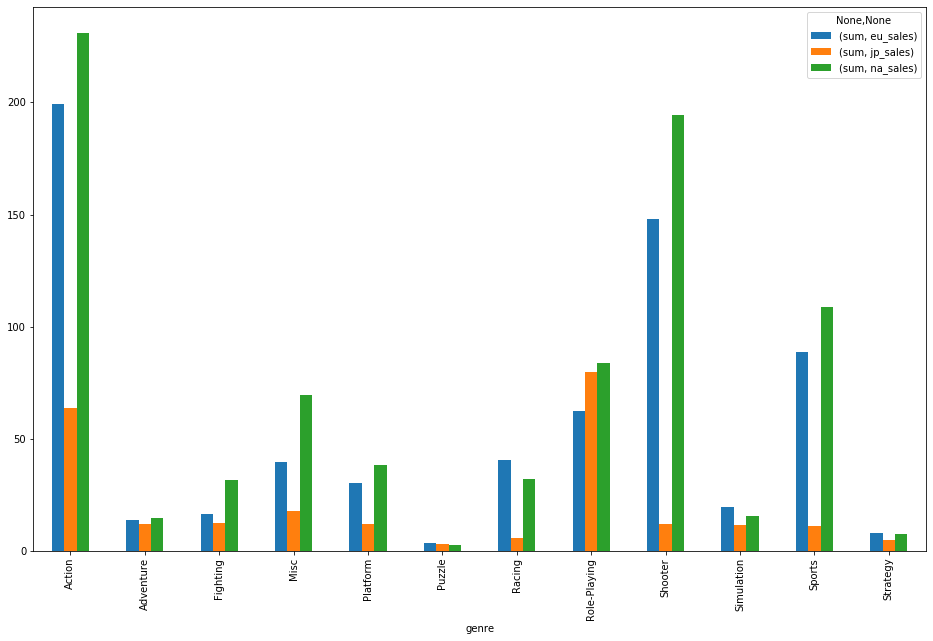

sum                  
             eu_sales jp_sales na_sales
genre                                  
Action         199.12    63.62   230.92
Adventure       13.96    12.07    14.76
Fighting        16.24    12.38    31.63
Misc            39.72    17.60    69.69
Platform        30.07    12.13    38.28
Puzzle           3.56     2.91     2.74
Racing          40.58     5.64    31.98
Role-Playing    62.30    79.87    83.78
Shooter        148.02    11.92   194.43
Simulation      19.72    11.64    15.37
Sports          88.48    11.09   108.70
Strategy         8.02     4.78     7.48

In [16]:
#Определение самых популярных жанров 
clients_genres = data_new.pivot_table(index='genre', values=['na_sales','eu_sales','jp_sales'], aggfunc=['sum'])
clients_genres.plot(kind='bar', figsize=(16,10))
plt.show()
clients_genres

Японцы предпочитают игры жанра Role-Playing в первую очередь. Также они сходятся с европейцыми и американцами по жанру Action. Кроме того, европейцы и американцы играют много в игры жанра Shooter и Sports, которые не популярные в Японии. 

/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


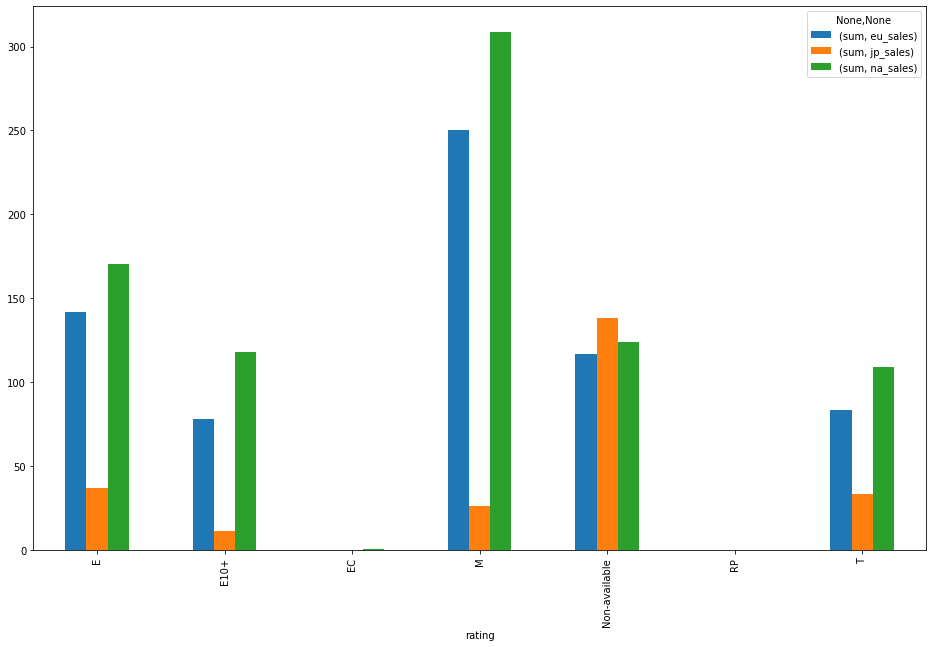

sum                  
              eu_sales jp_sales na_sales
rating                                  
E               141.73    36.68   170.17
E10+             78.00    11.23   117.72
EC                0.00     0.00     0.42
M               250.26    26.14   308.45
Non-available   116.61   138.21   123.69
RP                0.03     0.00     0.00
T                83.16    33.39   109.31

In [17]:
#Определение самых популярных жанров 
data_new.loc[data_new['rating'].isna(), 'rating'] = 'Non-available'
clients_rating = data_new.pivot_table(index='rating', values=['na_sales','eu_sales','jp_sales'], aggfunc=['sum'])
clients_rating.plot(kind='bar', figsize=(16,10))
plt.show()
clients_rating

В Европе и Северной Америке популярные игры для взрослых (+17) в первую очередь в то время как в Японии самые популярные игры это игры для всех (+6) и игры для подростков (+13). Последние два занимают второе и третье места в Европе и Америке, соответственно.

## Проверка гипотез

In [18]:
# проверка первой гипотезы 
df1 = data.query('platform == "PC"')
df2 = data.query('platform == "XOne"')
data_pc = df1[(~(df1['user_score'].isna())) & (df1['user_score'] != 11)]['user_score']
data_x1 = df2[(~(df2['user_score'].isna())) & (df2['user_score'] != 11)]['user_score']

print('Средний пользовательский рейтинг платформы PC:{:.2f}'.format(data_pc.mean()))
print('Средний пользовательский рейтинг платформы Xbox One:{:.2f}'.format(data_x1.mean()))

results1 = st.ttest_ind(data_pc, data_x1)

print('p-значение первой гипотезы: ', results1.pvalue)

Средний пользовательский рейтинг платформы PC:7.07
Средний пользовательский рейтинг платформы Xbox One:6.52
p-значение первой гипотезы:  9.379956219356061e-06


In [19]:
(data_pc>10).value_counts()

False    752
Name: user_score, dtype: int64

- Нулевая гипотеза: "Средние пользовательские рейтинги платформ Xbox One и PC не отличаются" 
- Альтернативная гипотеза: "Средние пользовательские рейтинги платформ Xbox One и PC значимо отличаются". 
- На основе результатов теста можно опровергнуть нулевую гипотезу. Отличия средних пользовательских рейтингов значимы. 

In [20]:
# проверка второй гипотезы 
df1 = data.query('genre == "Action"')
df2 = data.query('genre == "Sports"')
data_action = df1[(~(df1['user_score'].isna())) & (df1['user_score'] != 11)]['user_score']
data_sports = df2[(~(df2['user_score'].isna())) & (df2['user_score'] != 11)]['user_score']

print('Средний пользовательский рейтинг жанра Action:{:.2f}'.format(data_action.mean()))
print('Средний пользовательский рейтинг жанра Sports:{:.2f}'.format(data_sports.mean()))

results2 = st.ttest_ind(data_action, data_sports)

print('p-значение второй гипотезы: ', results2.pvalue)

Средний пользовательский рейтинг жанра Action:7.06
Средний пользовательский рейтинг жанра Sports:6.95
p-значение второй гипотезы:  0.06480928064420527


- Нулевая гипотеза: "Средние пользовательские рейтинги жанров Action и Sports не отличаются" 
- Альтернативная гипотеза: "Средние пользовательские рейтинги жанров Action и Sports значимо отличаются". 
- На основе результатов теста можно опровергнуть нулевую гипотезу. Отличия средних пользовательских рейтингов значимы. 

## Общий вывод

В рамках данного проекта были анализированы основные факторы, которые влияют на продажи игр. Для прогнозирования факторов успешности игр в 2017 году используются данные о продажах игр с 2010 года по 2016 год. 
- Жизненный цикл игровой платформы длится от 6 до 8 лет. Самые популярные платформы в это время являются ("PS4", "X360", "PS3", "XOne", "3DS"). Следовательно, ожидается что игры, выпускаемые данными платформами будут более успешными. 
- Большинство игр, выпускаемых данными платформами продавались за период (2010-2016) в количестве до 1 млн. копий. Некоторые игры достгли большого успеха и продовались в бОльших количествах (до 20 млн. копий в некоторых платформах). 
- Мнения критикоы умеренно влияет на продажи той или иной игры. В средним корреляция между мнениями критиков и продажами игр для этих 5 платформ положительная и ее коэффициент состовляет 0.4. 
- Самые выпускаемы жанры являются самыми продаваемыми. За период анализа таких жанров пять (Action, Shooter, Role-Playing, Sports, Misc).
- Пользователи в Японии отличаются от пользователей в Европе и Северной Америке. Японцы больше играют на 3DS. В то время как в Европе и Америке (PS3, PS4, X360) более популярные. Последняя платформа считается самой популярной в Северной Америке. Японцы предпочитают Role-Playing игры. В то время как европейцы и американцы предпочитают Action, Shooter и Sports. Скорее всего это связано со средним возростом пользователей в данных регионах. 